In [1]:
%matplotlib inline

# About this tutorial
This is a quick refresher on how neuroimaging data is represented and stored in python.

# 3D and 4D niimgs: handling and visualizing

In python, volume data is represented in a common format called "nifty" format. It has the extension `.nii` or `.nii.gz`. There are many packages for deadling with this format in python, though the most common is called `nibabel`.

Here we'll cover how to work with 3D and 4D niimgs, with a focus on the following topics:

* Loading neuroimaging data from disk
* Accessing the raw data and its properties
* Doing some simple visualizations of the data (in 3D and over time)

# Downloading tutorial datasets from Internet

Nilearn comes with functions that download public data from Internet. These are common or well-known tasks in neuroscience that have been made public by the researchers.

Let's first check where the data is downloaded on our disk.

In [13]:
from nilearn import datasets
import nibabel as nb
import os.path as op

In [14]:
path_data = op.expanduser('~/data_ucsf/machine_learning')
print('Datasets are stored in: %r' % datasets.get_data_dirs(path_data))

Datasets are stored in: ['/Users/choldgraf/data_ucsf/machine_learning']


In this tutorial we won't do any analysis, but instead will take a look at the *results* of a previous analysis. We can represent things like statistical maps using nifty files (since these are just some statistic represented at each voxel in the volume). Let's now retrieve a motor contrast from a localizer experiment.

In [20]:
data = datasets.fetch_localizer_button_task(data_dir=path_data)
print(data['description'])

Brainomics Localizer


Notes
-----
A protocol that captures the cerebral bases of auditory and
visual perception, motor actions, reading, language comprehension
and mental calculation at an individual level. Individual functional
maps are reliable and quite precise.


Content
-------
    :'func': Nifti images of the neural activity maps
    :'cmaps': Nifti images of contrast maps
    :'tmaps': Nifti images of corresponding t-maps
    :'masks': Structural images of the mask used for each subject.
    :'anats': Structural images of anatomy of each subject

References
----------
For more information about this dataset's structure:
http://brainomics.cea.fr/localizer/

Pinel, Philippe, et al.
"Fast reproducible identification and large-scale databasing of
 individual functional cognitive networks."
BMC neuroscience 8.1 (2007): 91.

Licence: usage is unrestricted for non-commercial research purposes.



In [15]:
tmap_filenames = data['tmaps']
print(tmap_filenames)

['/Users/choldgraf/data_ucsf/machine_learning/brainomics_localizer/brainomics_data/S02/t_map_left_auditory_&_visual_click_vs_right_auditory&visual_click.nii.gz']


Just as before, we can see that this dataset is well-described. It looks like we have the raw activity for the data in the `func` field, while the statistical maps are stored in `tmaps`. Let's take a look at this and visualize the statistic on the brain.

# Loading a raw 3d file
Volume files are generally represented in "nifty" format in python. These are easy to read with the `nibabel` package.

In [21]:
# tmap_filenames is a list of filenames. We need to take the first one.
tmap_filename = tmap_filenames[0]

# Now load the data
brain = nb.load(tmap_filename)

If you look inside `brain`, you'll find a number of methods and attributes in python that let you do different things with it. For example, we could return the transformation matrix to switch coordinate spaces:

In [9]:
brain.affine

array([[  -3.,    0.,    0.,   78.],
       [   0.,    3.,    0., -111.],
       [   0.,    0.,    3.,  -51.],
       [   0.,    0.,    0.,    1.]])

However, here we will focus on the raw data itslef. The data for this volume is stored in the object, and we can access it as a numpy array:

In [10]:
brain.get_data()[:2]

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]], dtype=float32)

In [11]:
# This is the dimensionality of the volume
# it is 3D, AKA a snapshot of activity
brain.get_data().shape

(53, 63, 46)

With `nilearn`, we can do some quick plotting simply by pointing to the file name. That way we don't have to load in the data manually.

# Visualizing a 3D file

The file contains a 3D volume, and we can easily visualize it as a
statistical map. `nilearn` has a number of functions for visualizing neuroimaging maps. These will generally take either a nifti object, or a file path to a nifti object.

In [22]:
from nilearn import plotting

/Users/choldgraf/Dropbox/github/forks/python/matplotlib/lib/matplotlib/cbook.py:135: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/choldgraf/Dropbox/github/forks/python/matplotlib/lib/matplotlib/artist.py:880: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


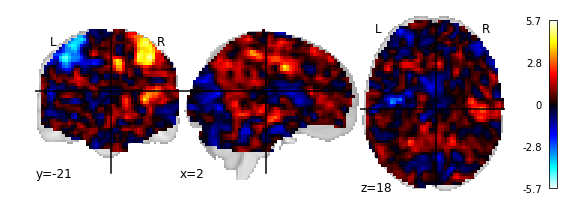

In [24]:
# Here we'll load the nifty object according to the statistical map
tmap = nb.load(tmap_filename)

# Then plot it
plotting.plot_stat_map(tmap)

# Alternatively, we could simply point it to the filename
# plotting.plot_stat_map(tmap_filename)

Note that the plotted background image was automatically assumed to be an MNI brain. If you have your own MRI images you can use these as well.

We can also do simple manipulations of the visualization, such as applying a threshold:

/Users/choldgraf/Dropbox/github/forks/python/matplotlib/lib/matplotlib/artist.py:880: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


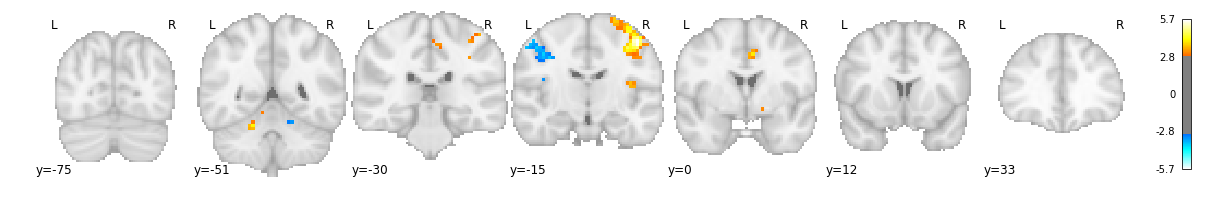

In [26]:
plotting.plot_stat_map(tmap_filename, threshold=3)

If you wish to see a collection of slices across an axis, you can use the `display_mode` argument:

/Users/choldgraf/Dropbox/github/forks/python/matplotlib/lib/matplotlib/artist.py:880: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


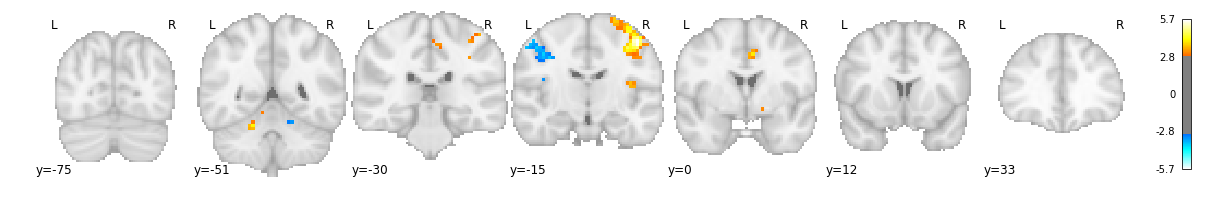

In [28]:
plotting.plot_stat_map(tmap_filename, threshold=3, display_mode='y')

/Users/choldgraf/Dropbox/github/forks/python/matplotlib/lib/matplotlib/artist.py:880: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


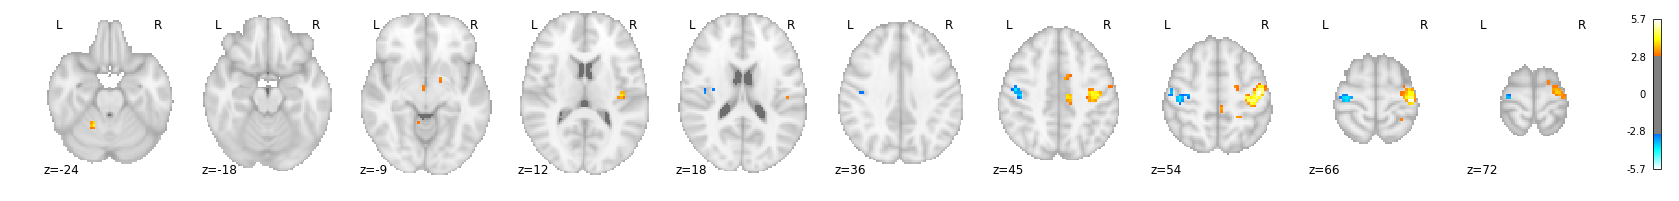

In [33]:
plotting.plot_stat_map(tmap_filename, threshold=3,
                       display_mode='z', cut_coords=10)

# Visualizing one volume in a 4D file

Finally, as we often do *functional* neuroimaging, we have another dimension to care about: time.

Fortunately, nifti files (and `nilearn`) are designed with time in mind. As an example, we'll download resting-state networks from the Smith 2009 study on correspondance between rest and task.

In [45]:
rsn = datasets.fetch_atlas_smith_2009(data_dir=path_data)['rsn10']
print(rsn)

/Users/choldgraf/data_ucsf/machine_learning/smith_2009/PNAS_Smith09_rsn10.nii.gz


## nilearn image I/O
Note that `nilearn` has its own module for loading / writing nifty files. This is using the `nibabel` package under the hood, but we'll use the `nilearn` functions below so you can see how the syntax works. We'll load in this file, which is a 4D nifti file. We'll load it into memory and print its shape.

In [47]:
from nilearn import image

print(nb.load(rsn).shape)

(91, 109, 91, 10)


The axes are now `(i, j, k, time)`

We can retrieve the first volume, which corresponds to the first sample in this dataset (note that Python indexing starts at 0):

In [48]:
first_rsn = image.index_img(rsn, 0)
print(first_rsn.shape)

(91, 109, 91)


first_rsn is a 3D image.

We can then plot it with the same functions as before.

/Users/choldgraf/Dropbox/github/forks/python/matplotlib/lib/matplotlib/cbook.py:135: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/choldgraf/Dropbox/github/forks/python/matplotlib/lib/matplotlib/artist.py:880: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


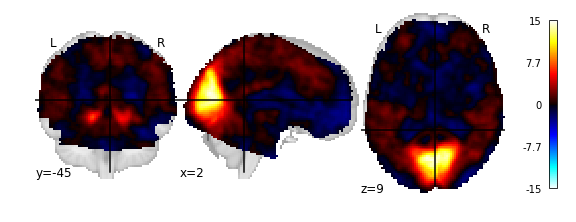

In [49]:
plotting.plot_stat_map(first_rsn)

# Looping on all volumes in a 4D file

If we want to plot all the volumes in this 4D file, we can use iter_img
to loop on them. This is similar to plotting statistical maps as you move down a particular axis of the 3-D brain, but you're looping across time instead.

Then we give a few arguments to plot_stat_map in order to have a more
compact display. We'll plot a single slice of the z-axis over time.

/Users/choldgraf/Dropbox/github/forks/python/matplotlib/lib/matplotlib/cbook.py:135: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


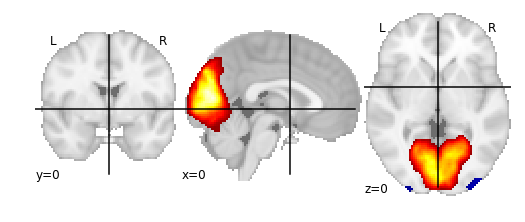

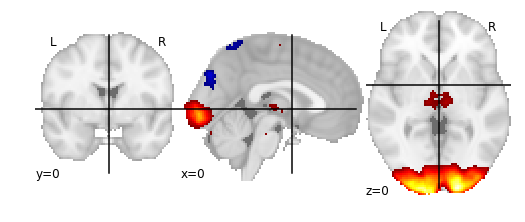

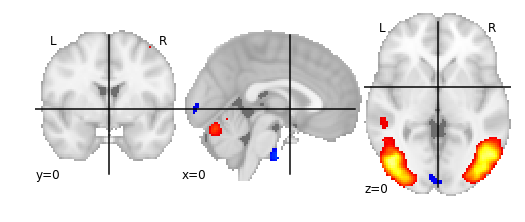

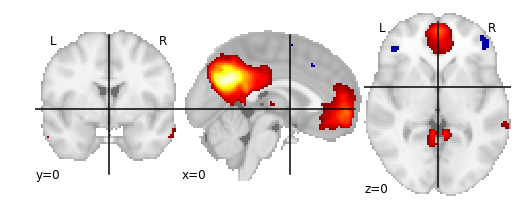

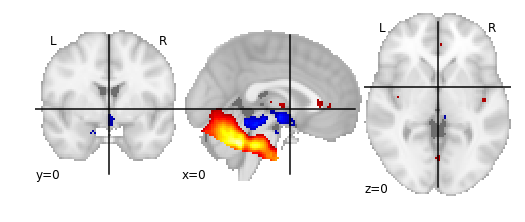

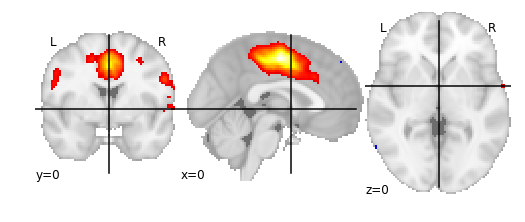

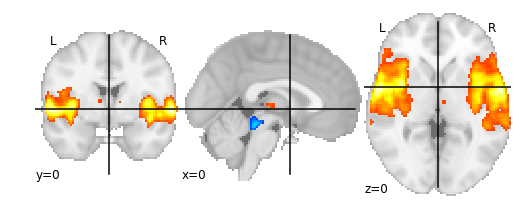

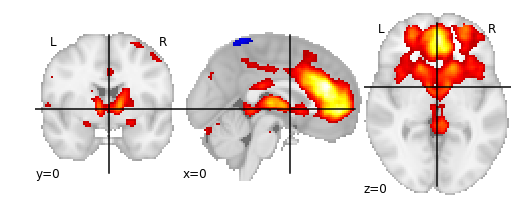

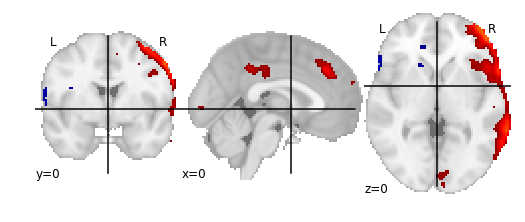

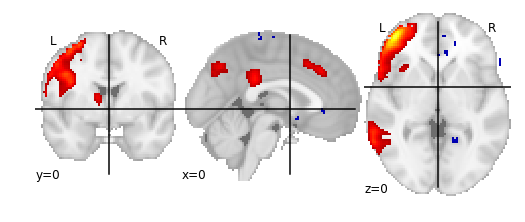

In [55]:
for img in image.iter_img(rsn):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(img, threshold=3, colorbar=False,
                           cut_coords=(0, 0, 0))

# Recap
To recap, neuroimaging images (niimgs as we call them) come in
different flavors:

* 3D images, containing only one brain volume
* 4D images, containing multiple brain volumes.

More details about the input formats in nilearn for 3D and 4D images is
given in the documentation section for nilearn.

Functions accept either 3D or 4D images, and we need to use these with either `nilearn.image.index_img` or `nilearn.image.iter_img`
to break down 4D images into 3D images.